In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,NaN,72.0,35.0,0.0,NaN,0.627,NaN,1
1,1.0,85.0,66.0,29.0,0.0,NaN,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,NaN,40.0,35.0,168.0,43.1,NaN,33.0,1


Imputasi missing value dengan mean, median, dan modus

In [13]:
df = pd.read_csv('diabetes.csv')

print("Jumlah missing value sebelum imputasi:")
print(df.isna().sum())

imputate = df.select_dtypes(include=[np.number])

df_mean = imputate.fillna(imputate.mean())
missing_values_mean = df_mean.isna().sum()

df_median = imputate.fillna(imputate.median())
missing_values_median = df_median.isna().sum()

df_mode = imputate.fillna(imputate.mode().iloc[0])
missing_values_mode = df_mode.isna().sum()

print("\nJumlah missing value setelah imputasi dengan mean:")
print(missing_values_mean)
print("\nJumlah missing value setelah imputasi dengan median:")
print(missing_values_median)
print("\nJumlah missing value setelah imputasi dengan modus:")
print(missing_values_mode)


Jumlah missing value sebelum imputasi:
Pregnancies                  77
Glucose                     115
BloodPressure               154
SkinThickness                38
Insulin                     192
BMI                         230
DiabetesPedigreeFunction     77
Age                         154
Outcome                       0
dtype: int64

Jumlah missing value setelah imputasi dengan mean:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Jumlah missing value setelah imputasi dengan median:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
d

korelasi antar variabel menggunakan heatmap

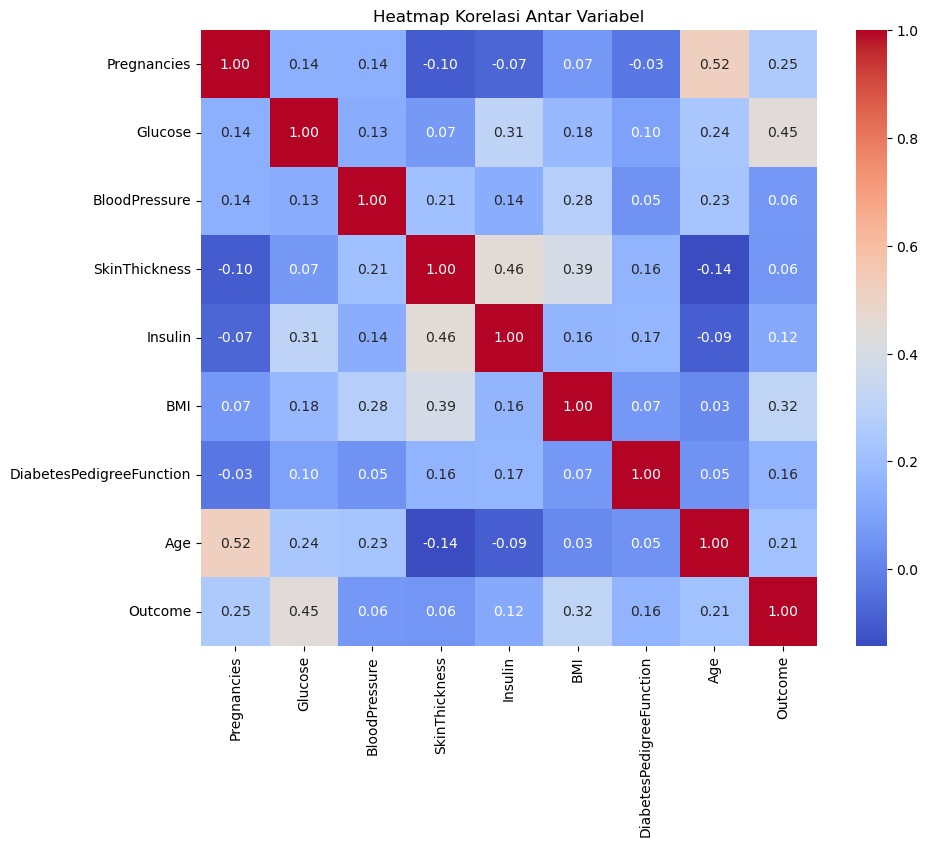

In [14]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

Imbalance handling dengan undersampling

Before undersampling:
Outcome
0    500
1    268
Name: count, dtype: int64


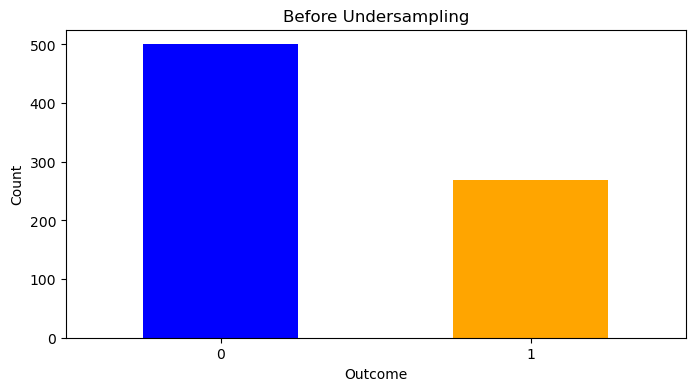


After undersampling:
Outcome
0    268
1    268
Name: count, dtype: int64


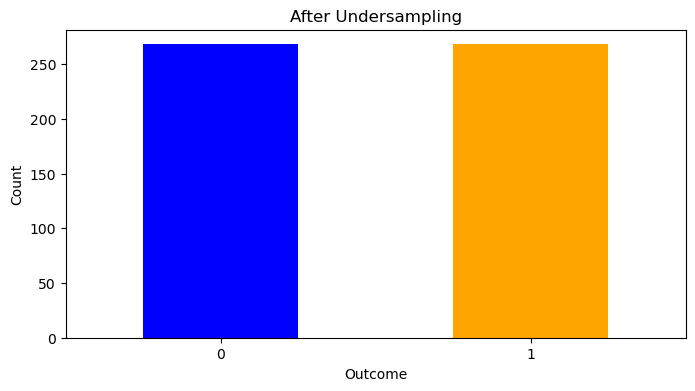

In [22]:
from imblearn.under_sampling import RandomUnderSampler
X = df.drop('Outcome', axis=1)
y = df['Outcome']

print("Before undersampling:")
print(y.value_counts())

plt.figure(figsize=(8, 4))
y.value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Before Undersampling')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

print("\nAfter undersampling:")
print(y_resampled.value_counts())

plt.figure(figsize=(8, 4))
y_resampled.value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('After Undersampling')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Outcome'] = y_resampled


Scaling dengan Robust Scaler

In [24]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
X_robust_scaled = robust_scaler.fit_transform(X_resampled)

print("Hasil scaling dengan Robust Scaler:")
print(pd.DataFrame(X_robust_scaled, columns=X.columns).describe())

Hasil scaling dengan Robust Scaler:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   481.000000  447.000000     422.000000     507.000000  402.000000   
mean      0.217879    0.079469      -0.184686      -0.109159    0.451837   
std       0.685636    0.763492       1.269548       0.507491    0.796008   
min      -0.600000   -2.750000      -4.500000      -0.750000   -0.130769   
25%      -0.400000   -0.431818      -0.500000      -0.750000   -0.130769   
50%       0.000000    0.000000       0.000000       0.000000    0.000000   
75%       0.600000    0.568182       0.500000       0.250000    0.869231   
max       2.800000    1.772727       2.625000       2.343750    4.046154   

              BMI  DiabetesPedigreeFunction         Age  
count  375.000000                480.000000  436.000000  
mean    -0.020687                  0.259771    0.179759  
std      0.983571                  0.816354    0.715297  
min     -3.963636                 -0.716889   -

Scaling dengan Min-Max Scaler

In [25]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
X_minmax_scaled = minmax_scaler.fit_transform(X_resampled)

print("\nHasil scaling dengan Min-Max Scaler:")
print(pd.DataFrame(X_minmax_scaled, columns=X.columns).describe())


Hasil scaling dengan Min-Max Scaler:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   481.000000  447.000000     422.000000     507.000000  402.000000   
mean      0.240553    0.625611       0.605658       0.207140    0.139482   
std       0.201658    0.168812       0.178182       0.164038    0.190573   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       0.058824    0.512563       0.561404       0.000000    0.000000   
50%       0.176471    0.608040       0.631579       0.242424    0.031308   
75%       0.352941    0.733668       0.701754       0.323232    0.239411   
max       1.000000    1.000000       1.000000       1.000000    1.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  375.000000                480.000000  436.000000  
mean     0.484789                  0.179018    0.252473  
std      0.120931                  0.149635    0.224407  
min      0.000000                  0.000000  